In [23]:
# SEP769 - July 27, 2021
# Amir Kamaleddine, Ernani Fantinatti, Mohammed Ibraheem
# CNN model for classifying normal and imbalanced motors as part of the MAFAULDA motor fault dataset
# https://github.com/efantinatti/MAFAULDA_SEP769

In [24]:
# Load in tensorboard extension to view results interactively
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
# Load relevant libraries
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
import matplotlib.pyplot as plt
import glob
import datetime

In [41]:
# Decide whether to load model from a .h5 file or train a new one
saved_model = 0

In [27]:
#Delete tensorboard logs from previous runs
#If using Collab or Unix system use !rm, otherwise
#if using windows use...
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
# Loads train/test data from .txt files to np arrays 
# Ensure you choose the correct file directory
dir = "D:/SEP769_DeepLearning/jul20data/"

train_reload = np.loadtxt(dir + 'train_data.txt')
test_reload = np.loadtxt(dir + 'test_data.txt')

print(train_reload.shape)
print("Loaded data files...")

(2315000, 8)
Loaded data files...


In [29]:
# Shaping the training/testing data
# Shapes the data into an nx500x8 array
# Each sequence is 500 timestamps (10 ms of data collection)

train_data = np.reshape(train_reload,(-1,500, 8))
test_data = np.reshape(test_reload,(-1,500, 8))
print(train_data.shape)

(4630, 500, 8)


In [30]:
# Loads labels corresponding to training/test data
train_label = np.loadtxt(dir + 'train_label.txt').astype(int)
test_label = np.loadtxt(dir + 'test_label.txt').astype(int)
print(sum(train_label == 0))
print(sum(train_label != 0))

2160
2470


In [42]:
# Build the model
# Sequential model
model = Sequential()

# Conv1D is used to perform convolution on temporal data
model.add(Conv1D(30, (5), input_shape=(500, 8), padding = 'same', strides = 10, activation='relu'))

# Flatten before feeding into dense layers
model.add(Flatten())

# Dense layers and Output Layer
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
# Binary crossentropy for a binary classifier
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 30)            1230      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                48032     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 49,807
Trainable params: 49,807
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Log model training process with Tensorboard
ld = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callTensorboard = tf.keras.callbacks.TensorBoard(log_dir=ld, histogram_freq=1)

In [44]:
if saved_model == 0:
    # Train model
    # Note that validation data is NOT used to train model at all
    history = model.fit(train_data, train_label, validation_data=(test_data, test_label), callbacks = [callTensorboard], epochs=10, batch_size=32)
    model.save('CNN.h5')
else:
    model = load_model('CNN.h5')

Epoch 1/10
145/145 [==============================] - 3s 17ms/step - loss: 0.4826 - accuracy: 0.7392 - val_loss: 0.2304 - val_accuracy: 0.9311
Epoch 2/10
145/145 [==============================] - 1s 6ms/step - loss: 0.1368 - accuracy: 0.9568 - val_loss: 0.1620 - val_accuracy: 0.9707
Epoch 3/10
145/145 [==============================] - 1s 5ms/step - loss: 0.0753 - accuracy: 0.9847 - val_loss: 0.1266 - val_accuracy: 0.9720
Epoch 4/10
145/145 [==============================] - 1s 5ms/step - loss: 0.0572 - accuracy: 0.9838 - val_loss: 0.1031 - val_accuracy: 0.9750
Epoch 5/10
145/145 [==============================] - 1s 5ms/step - loss: 0.0461 - accuracy: 0.9866 - val_loss: 0.0716 - val_accuracy: 0.9805
Epoch 6/10
145/145 [==============================] - 1s 6ms/step - loss: 0.0267 - accuracy: 0.9937 - val_loss: 0.0622 - val_accuracy: 0.9774
Epoch 7/10
145/145 [==============================] - 1s 6ms/step - loss: 0.0281 - accuracy: 0.9922 - val_loss: 0.0591 - val_accuracy: 0.9780
Epoch

In [45]:
# Evaluate model performance with prediction set
pred_accuracy = model.evaluate(test_data, test_label)

52/52 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9811


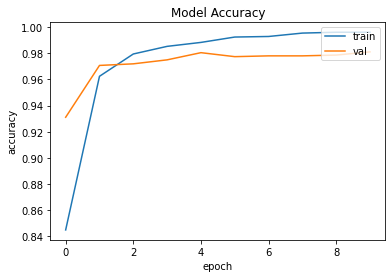

In [46]:
# Plot model accuracy over epoch
if saved_model == 0:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

In [ ]:
%tensorboard --logdir logs/fit